<a href="https://colab.research.google.com/github/esrayuzgec/ALZHEIMER_TEZ/blob/main/XRESNET50_CNMILD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:

from fastai.vision.all import *
from fastbook import *

In [3]:
path = Path("/content/gdrive/MyDrive/OASISCNMILD")


In [4]:
path.ls()

(#6) [Path('/content/gdrive/MyDrive/OASISCNMILD/CNMILD_convnext.pth'),Path('/content/gdrive/MyDrive/OASISCNMILD/CNMILD_ConvNext.pkl'),Path('/content/gdrive/MyDrive/OASISCNMILD/Train'),Path('/content/gdrive/MyDrive/OASISCNMILD/Test'),Path('/content/gdrive/MyDrive/OASISCNMILD/cnmildVGG16_2.pkl'),Path('/content/gdrive/MyDrive/OASISCNMILD/cnmildVGG16_2.pth')]

In [5]:
train_fnames = get_image_files(path)
     

In [6]:
item_tfms=Resize(216)
batch_tfms=aug_transforms=[Normalize.from_stats(*imagenet_stats)]

In [7]:

braindb = DataBlock(blocks=(ImageBlock,CategoryBlock),
                  get_items= get_image_files,
                  get_y = parent_label,
                  splitter =RandomSplitter(valid_pct= 0.1, seed = 42),
                  item_tfms = item_tfms,
                  batch_tfms = batch_tfms
                  )
dls = braindb.dataloaders(path,bs=32)
     

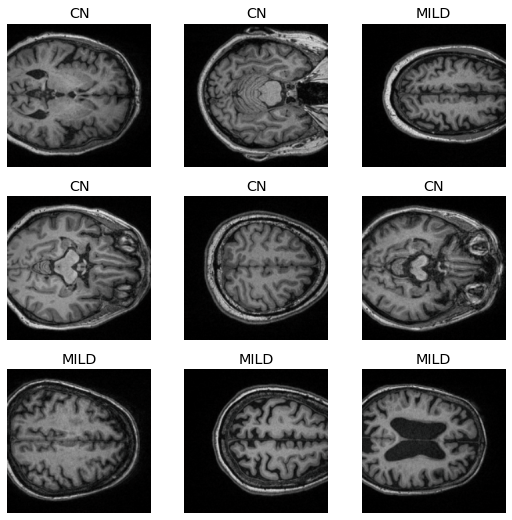

In [8]:
dls.show_batch(max_n=9,unique=False)

In [9]:

learn = vision_learner(dls, xresnet50, loss_func=CrossEntropyLossFlat(), metrics=accuracy)

SuggestedLRs(valley=0.00019054606673307717)

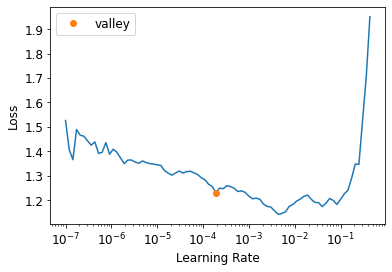

In [10]:

learn.lr_find()

In [11]:
learn.fine_tune(50,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.771625,0.435226,0.808219,01:20


epoch,train_loss,valid_loss,accuracy,time
0,0.468938,0.245741,0.907534,01:09
1,0.411393,0.225657,0.895548,01:08
2,0.345007,0.194709,0.916096,01:08
3,0.315832,0.139838,0.945205,01:08
4,0.249024,0.156049,0.928082,01:08
5,0.223667,0.124324,0.946918,01:08
6,0.215777,0.099043,0.957192,01:08
7,0.181665,0.104260,0.955479,01:08
8,0.186288,0.110474,0.957192,01:08
9,0.167760,0.128221,0.948630,01:08


epoch,train_loss,valid_loss,accuracy,time
0,0.468938,0.245741,0.907534,01:09
1,0.411393,0.225657,0.895548,01:08
2,0.345007,0.194709,0.916096,01:08
3,0.315832,0.139838,0.945205,01:08
4,0.249024,0.156049,0.928082,01:08
5,0.223667,0.124324,0.946918,01:08
6,0.215777,0.099043,0.957192,01:08
7,0.181665,0.104260,0.955479,01:08
8,0.186288,0.110474,0.957192,01:08
9,0.167760,0.128221,0.948630,01:08


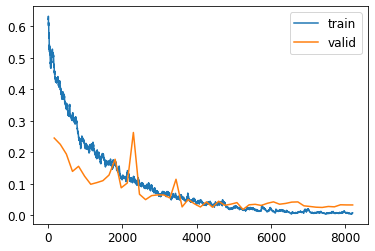

In [12]:
learn.recorder.plot_loss()


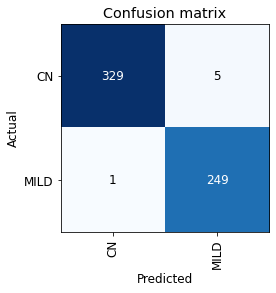

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

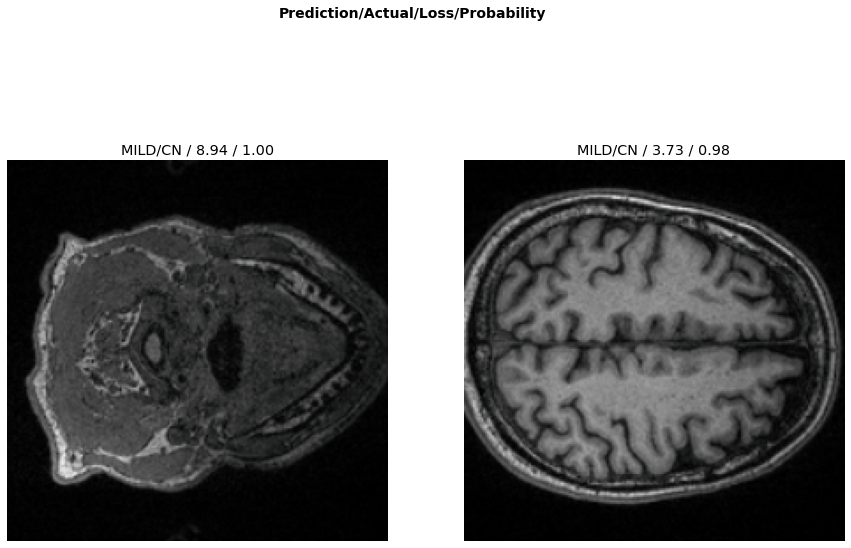

In [14]:
interp.plot_top_losses(2, figsize=(15,10))


In [15]:
interp.most_confused()


[('CN', 'MILD', 5), ('MILD', 'CN', 1)]

In [16]:
interp.print_classification_report()


              precision    recall  f1-score   support

          CN       1.00      0.99      0.99       334
        MILD       0.98      1.00      0.99       250

    accuracy                           0.99       584
   macro avg       0.99      0.99      0.99       584
weighted avg       0.99      0.99      0.99       584



In [17]:
learn.save(path/'CNMILD_ResNet50_Train')


Path('/content/gdrive/MyDrive/OASISCNMILD/CNMILD_ResNet50_Train.pth')

In [18]:
learn.export(path/'CNMILD_ResNet50_Train.pkl')



In [19]:
all_files= get_image_files(path)


In [27]:

dblock=DataBlock(blocks=(ImageBlock(cls=PILImage),CategoryBlock),
                 splitter=GrandparentSplitter(train_name='Train', valid_name='Test'),
                 get_y=parent_label,
                 item_tfms=Resize(216),
                 batch_tfms=Normalize.from_stats(*imagenet_stats)
                 
                 
)

In [28]:
dls_test = dblock.dataloaders(all_files)


In [29]:
print("Number of examples in testing:", len(dls_test.valid_ds))


Number of examples in testing: 1287


In [30]:
learn1 = vision_learner(dls_test, xresnet50, metrics=accuracy).load('/content/gdrive/MyDrive/OASISCNMILD/CNMILD_ResNet50_Train')


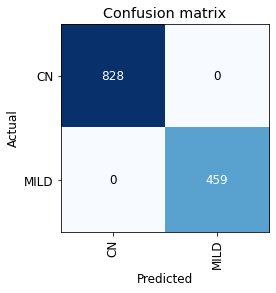

In [31]:
interp = ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()

In [32]:
preds, targs = learn1.tta()
accuracy(preds, targs).item()
     

1.0